#### A telephone company wishes to investigate their customer churn count. The company wants to check the following facts.

##### Importing required libraries

In [1]:
import pandas as pd

In [2]:
import seaborn as sns

##### Importing dataset

In [3]:
data= pd.read_excel("C:/Users/rakhi/Downloads/Telco-Customer-Churn.xlsx")

In [4]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [5]:
data.info() #checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### 1. The number of customers owns their connection based on :

In [6]:
data_1=data[data["Churn"]=="No"] # data of customers who own the connection

#### a. Gender

In [7]:
data_1["gender"].value_counts()

Male      2625
Female    2549
Name: gender, dtype: int64

#### b. Citizenship

In [9]:
data_1["SeniorCitizen"].value_counts()

0    4508
1     666
Name: SeniorCitizen, dtype: int64

#### 2. The number of customers left their service:

In [10]:
data_2=data[data["Churn"]=="Yes"] # data of customers who left the service

#### a. Gender

In [11]:
data_2["gender"].value_counts()

Female    939
Male      930
Name: gender, dtype: int64

#### b. Citizenship

In [13]:
data_2["SeniorCitizen"].value_counts()

0    1393
1     476
Name: SeniorCitizen, dtype: int64

#### 3. Preference of payment method based on :

#### a. Churn

In [14]:
data.loc[:,["Churn","PaymentMethod"]].value_counts()

Churn  PaymentMethod            
No     Mailed check                 1304
       Electronic check             1294
       Credit card (automatic)      1290
       Bank transfer (automatic)    1286
Yes    Electronic check             1071
       Mailed check                  308
       Bank transfer (automatic)     258
       Credit card (automatic)       232
dtype: int64

#### b. Contract

In [17]:
data.groupby("Contract")["PaymentMethod"].value_counts()

Contract        PaymentMethod            
Month-to-month  Electronic check             1850
                Mailed check                  893
                Bank transfer (automatic)     589
                Credit card (automatic)       543
One year        Credit card (automatic)       398
                Bank transfer (automatic)     391
                Electronic check              347
                Mailed check                  337
Two year        Credit card (automatic)       581
                Bank transfer (automatic)     564
                Mailed check                  382
                Electronic check              168
Name: PaymentMethod, dtype: int64

#### 4. Internet service preference by gender based on churn status.

In [18]:
data.groupby(["Churn","gender"])["InternetService"].value_counts()

Churn  gender  InternetService
No     Female  DSL                969
               Fiber optic        889
               No                 691
       Male    DSL                993
               Fiber optic        910
               No                 722
Yes    Female  Fiber optic        664
               DSL                219
               No                  56
       Male    Fiber optic        633
               DSL                240
               No                  57
Name: InternetService, dtype: int64

#### 5. Explain the descriptive statistics of “TotalCharges” based on:

#### a. Gender

In [19]:
data.groupby("gender")["TotalCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
Female,3488.0,2289.338308,2276.695359,18.85,403.300,1389.05,3834.0625,8672.45
Male,3555.0,2291.680667,2273.095299,18.80,399.275,1406.00,3778.1000,8684.80


<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

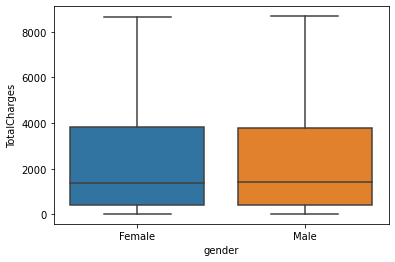

In [22]:
sns.boxplot(x=data["gender"],y=data["TotalCharges"])

#### b. Contract

In [20]:
data.groupby("Contract")["TotalCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
Contract,,,,,,,,
Month-to-month,3875.0,1369.254581,1613.879008,18.85,160.100,679.55,2066.50,8061.50
One year,1473.0,3038.377461,2233.477741,18.80,989.450,2658.40,4860.35,8684.80
Two year,1695.0,3746.752383,2582.454154,20.35,1280.125,3638.25,6044.30,8672.45


<AxesSubplot:xlabel='Contract', ylabel='TotalCharges'>

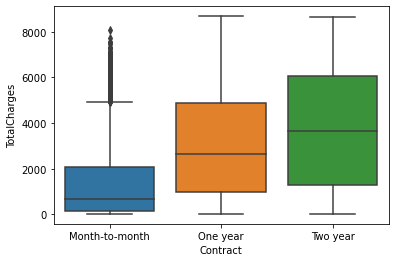

In [23]:
sns.boxplot(x=data["Contract"],y=data["TotalCharges"])

#### c. Payment Method

In [21]:
data.groupby("PaymentMethod")["TotalCharges"].describe()

,count,mean,std,min,25%,50%,75%,max
PaymentMethod,,,,,,,,
Bank transfer (automatic),1544.0,3083.566023,2360.362773,19.25,1052.3875,2479.500,4948.3375,8684.80
Credit card (automatic),1522.0,3074.920894,2410.536742,19.30,989.4000,2454.175,5016.5500,8670.10
Electronic check,2365.0,2090.868182,2155.435320,18.85,308.0500,1253.900,3340.5500,8564.75
Mailed check,1612.0,1083.236973,1509.101844,18.80,116.9375,473.675,1316.0000,8476.50


<AxesSubplot:xlabel='PaymentMethod', ylabel='TotalCharges'>

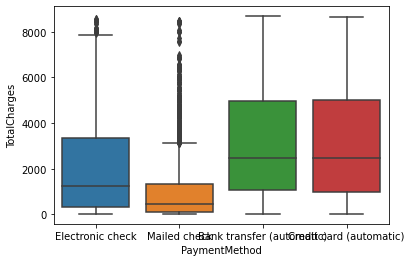

In [24]:
sns.boxplot(x=data["PaymentMethod"],y=data["TotalCharges"])